In [54]:
# This project  is an analysis  of drug review data
# Here provides a basic structure for loading, analyzing, and modeling the drug review data

In [55]:


import pandas as pd
import numpy as np

#Read the data from csv file
df = pd.read_csv('Drug.csv')

df.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


In [56]:
# Display the first few rows of the dataset to understand its structure
df.head()

# Checking for missing values
print(df.isnull().sum())

Condition       0
Drug            0
Indication      0
Type            0
Reviews         0
Effective       0
EaseOfUse       0
Satisfaction    0
Information     0
dtype: int64


In [57]:
# Drop rows with missing values for simplicity (you can handle them in more advanced ways too)
df = df.dropna()

# Verify the structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2219 non-null   object 
 1   Drug          2219 non-null   object 
 2   Indication    2219 non-null   object 
 3   Type          2219 non-null   object 
 4   Reviews       2219 non-null   object 
 5   Effective     2219 non-null   float64
 6   EaseOfUse     2219 non-null   float64
 7   Satisfaction  2219 non-null   float64
 8   Information   2219 non-null   object 
dtypes: float64(3), object(6)
memory usage: 156.2+ KB
None


         Effective    EaseOfUse  Satisfaction
count  2219.000000  2219.000000   2219.000000
mean      3.557972     3.958824      3.218774
std       1.113128     1.037877      1.230933
min       1.000000     1.000000      1.000000
25%       3.000000     3.540000      2.400000
50%       3.680000     4.100000      3.130000
75%       4.330000     5.000000      4.000000
max       5.000000     5.000000      5.000000


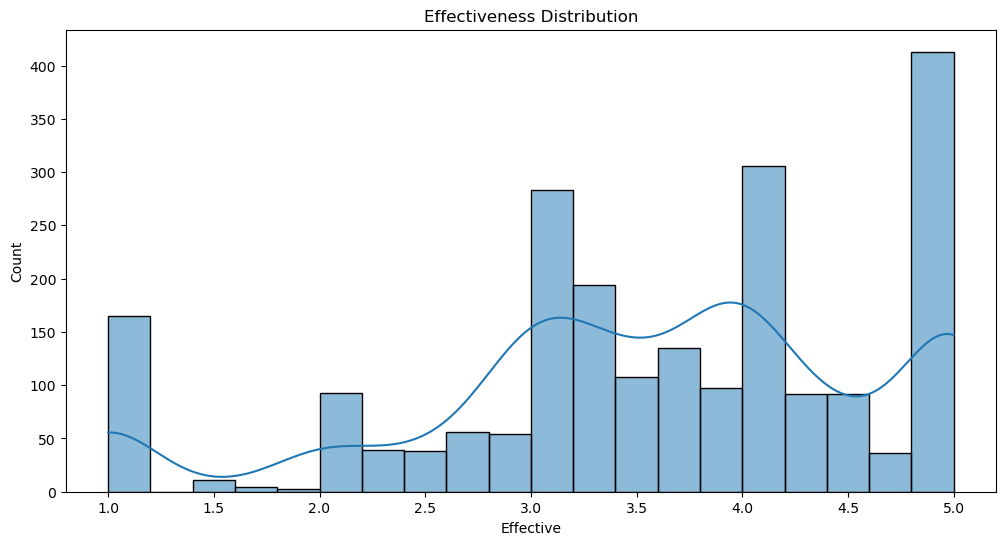

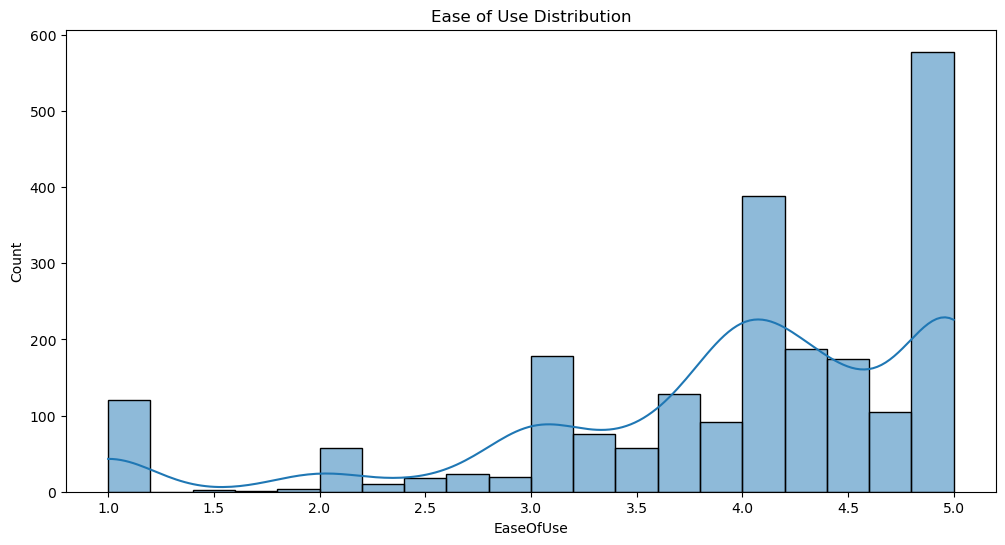

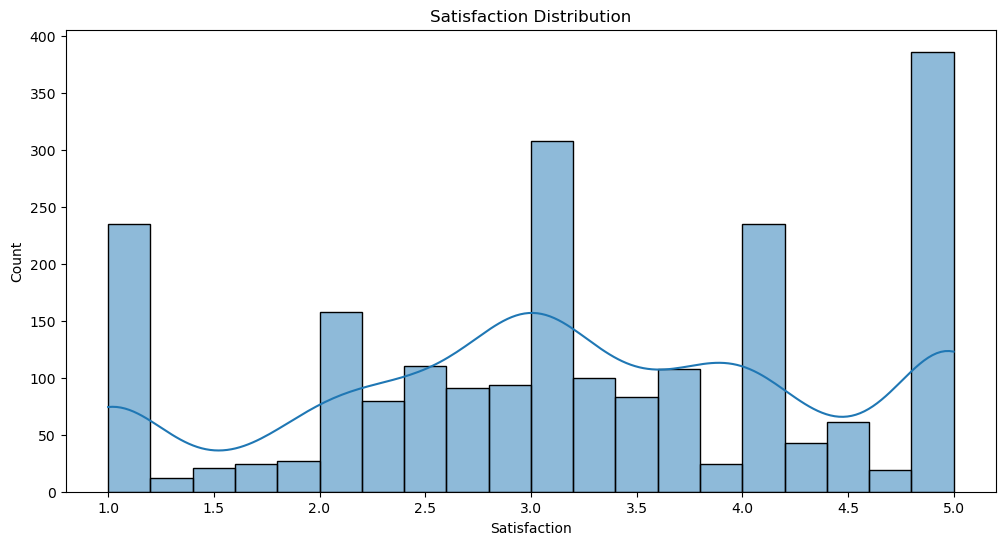

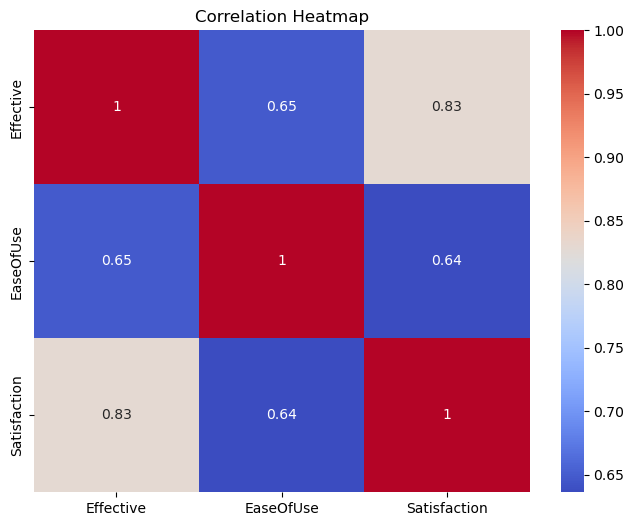

In [58]:
#Exploratory Data Analysis

# Basic statistical description of numerical columns
print(df.describe())

# Check the distribution of reviews, effectiveness, ease of use, and satisfaction
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of 'Effective', 'EaseOfUse', 'Satisfaction'
# Shows the distribution of effectiveness ratings, along with the Kernel Desnsity Estimate Line
# Interpretation
    #x axis represents the effectiveness ratings, while y axis represents the frequency of those rating
plt.figure(figsize=(12,6))
sns.histplot(df['Effective'], kde=True, bins=20)
plt.title('Effectiveness Distribution')
plt.show()
# Ease of Distribution
# The histogram displays the distribution of satisfaction ratings and the frequency of those ratings
plt.figure(figsize=(12,6))
sns.histplot(df['EaseOfUse'], kde=True, bins=20)
plt.title('Ease of Use Distribution')
plt.show()
#x axis represents the ease of use ratings, while y axis represents the frequency of those rating
plt.figure(figsize=(12,6))
sns.histplot(df['Satisfaction'], kde=True, bins=20)
plt.title('Satisfaction Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Effective', 'EaseOfUse', 'Satisfaction']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [59]:
#Data Preprocessing - Simplify the problem by predicting the satisfaction rating based on effectiveness, ease of use

# Select relevant features ( Effective' and 'EaseOfUse' to predict 'Satisfaction')
X = df[['Effective', 'EaseOfUse']]
y = df['Satisfaction']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (scaling the features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Train the ML model using simple linear regression to predict satisfaction

# Import and train a Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


Mean Squared Error: 0.3933535682516333
R-squared: 0.7193823525573764


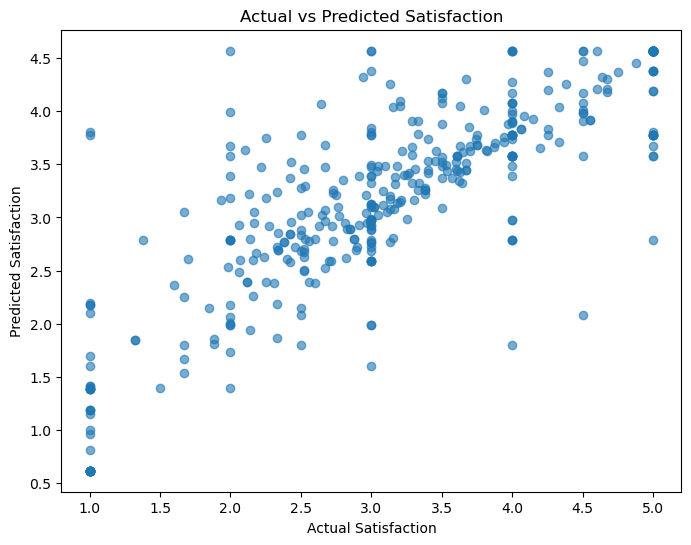

In [61]:
# Evaluate how well the model is performing by checking the below, (mean squared error, and r squared error)
# Evaluate the model using Mean Squared Error and R-squared score
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs predicted satisfaction scores
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Actual vs Predicted Satisfaction')
plt.xlabel('Actual Satisfaction')
plt.ylabel('Predicted Satisfaction')
plt.show()


In [62]:
#Conclusion
#Mean Squared error - this is a measure of how close the predicted values are to the actual values, the lower the better. 
    # -It calculates the average of the squares of the errors, that is the difference between the predicted and the actual
    # -In this case the MSE is -0.39, the key is to compared this with the MSE from other models to assess improvement
#R-Squared - a statisical measure that represents the proportion of the variance for a dependent variable (Satisfaction), 
    # thats explained by other Variables (Effectiveness & Ease of Use)
    # An R-squared value of 1 means that the model perfectly explains all the variability of the response data around its mean, 
    # while a value of 0 means it explains none of the variability.
    # In these results, an R-squared of 0.719 means that approximately 71.9% of the variability in satisfaction scores can be explained by the effectiveness and ease of use ratings. 
    #This is a fairly good score, indicating that the model captures a significant amount of the relationship between the predictors and the response.